<center>

# COMM061 – Natural Language Processing

# Individual Coursework report

# Submitted by:
# HARSHITA WARDHAN
# 6831456
# hw01458@surrey.ac.uk

</center>


Exploratory Data Analysis

In [8]:
pip install datasets


In [9]:
import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter

In [10]:
from datasets import load_dataset

dataset = load_dataset("surrey-nlp/PLOD-CW")

In [11]:
# Display dataset structure
print(dataset)

# Show the first few examples of the dataset
print(dataset['train'][0:5])  # Adjust 'train' if your dataset has different splits like 'test' or 'validation'


DatasetDict({
    train: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 1072
    })
    validation: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 126
    })
    test: Dataset({
        features: ['tokens', 'pos_tags', 'ner_tags'],
        num_rows: 153
    })
})
{'tokens': [['For', 'this', 'purpose', 'the', 'Gothenburg', 'Young', 'Persons', 'Empowerment', 'Scale', '(', 'GYPES', ')', 'was', 'developed', '.'], ['The', 'following', 'physiological', 'traits', 'were', 'measured', ':', 'stomatal', 'conductance', '(', 'gs', ',', 'mol', 'H2O', 'm-2', 's-1', ')', ',', 'transpiration', 'rate', '(', 'E', ',', 'mmol', 'H2O', 'm-2', 's-1', ')', ',', 'net', 'photosynthetic', 'rate', '(', 'PN', ',', 'μmol', 'm-2', 's-1', ')', 'and', 'intercellular', 'CO2', 'concentration', 'CO2', '(', 'Ci', ',', 'μmol', 'm-2', 's-1', ')', '.'], ['Minor', 'H', 'antigen', 'alloimmune', 'responses', 'readily', 'occur', 'in', 'the', 'setting', 'of', '

In [12]:
#Display the first record in the 'train' dataset
first_record = dataset['train'][1]

# Show the entire content of the first record
print(first_record)

{'tokens': ['The', 'following', 'physiological', 'traits', 'were', 'measured', ':', 'stomatal', 'conductance', '(', 'gs', ',', 'mol', 'H2O', 'm-2', 's-1', ')', ',', 'transpiration', 'rate', '(', 'E', ',', 'mmol', 'H2O', 'm-2', 's-1', ')', ',', 'net', 'photosynthetic', 'rate', '(', 'PN', ',', 'μmol', 'm-2', 's-1', ')', 'and', 'intercellular', 'CO2', 'concentration', 'CO2', '(', 'Ci', ',', 'μmol', 'm-2', 's-1', ')', '.'], 'pos_tags': ['DET', 'ADJ', 'ADJ', 'NOUN', 'AUX', 'VERB', 'PUNCT', 'ADJ', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'PUNCT', 'PUNCT', 'NOUN', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'PUNCT', 'PUNCT', 'ADJ', 'ADJ', 'NOUN', 'PUNCT', 'PROPN', 'PUNCT', 'NOUN', 'NOUN', 'NOUN', 'PUNCT', 'CCONJ', 'ADJ', 'NOUN', 'NOUN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'NOUN', 'NOUN', 'NOUN', 'PUNCT', 'PUNCT'], 'ner_tags': ['B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-LF', 'I-LF', 'B-O', 'B-AC', 'B-O', 'B-O', 'B-O', 'B-O', 'B-O', 'B-O

In [13]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


This code snippet is used to visualize the frequency of each BIO tag in the training set of a Named Entity Recognition (NER) dataset. It first extracts the NER tags from the training set and flattens the list to count the occurrences of each tag using the Counter class from the collections module. Then, it prepares a bar plot using Matplotlib and Seaborn libraries to display the frequency of each tag. The tags are sorted by count for a more organized look, and a color palette is created to differentiate between different tags. Text labels are added to each bar to show the exact frequency, and finally, the plot is displayed. This visualization helps in understanding the distribution of different NER tags in the dataset.

C:\Users\hward\AppData\Local\Temp\ipykernel_15820\1882613440.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(sorted_tags.keys()), y=list(sorted_tags.values()), palette=palette)


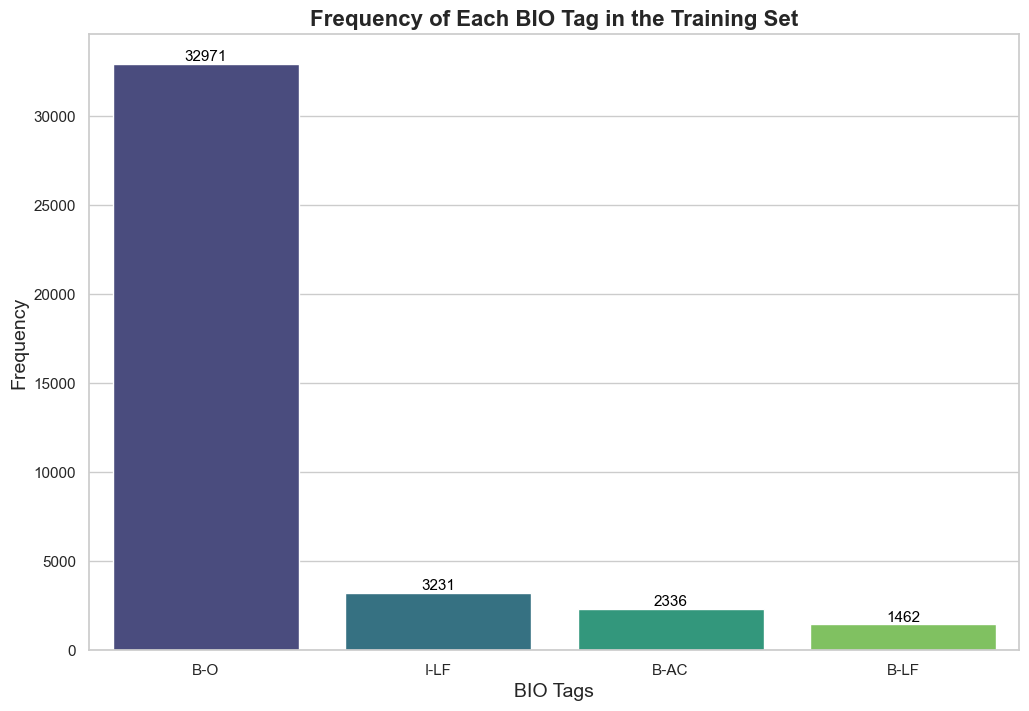

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Extract ner_tags from the training set and flatten the list
ner_tags = [tag for sublist in dataset['train']['ner_tags'] for tag in sublist]

# Count occurrences of each tag
tag_counts = Counter(ner_tags)

# Prepare the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Setting the style of the plot

# Creating a color palette
palette = sns.color_palette("viridis", len(tag_counts))

# Sorting the tags by count for a more organized look
sorted_tags = dict(sorted(tag_counts.items(), key=lambda item: item[1], reverse=True))

# Plotting
ax = sns.barplot(x=list(sorted_tags.keys()), y=list(sorted_tags.values()), palette=palette)
plt.title('Frequency of Each BIO Tag in the Training Set', fontsize=16, fontweight='bold')
plt.xlabel('BIO Tags', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding the text labels for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()


This code analyzes the co-occurrence patterns between part-of-speech (POS) tags and named entity recognition (NER) tags for abbreviations and long-forms in the training data.
It first loads the dataset and extracts the POS and NER tag sequences. Then, it creates a co-occurrence matrix showing how frequently each POS tag co-occurs with each NER tag across the training examples.
Finally, it visualizes this co-occurrence matrix as a heatmap, allowing you to visually identify strong associations between certain POS and NER tags.
By understanding these co-occurrence patterns, you can gain insights into the linguistic characteristics of abbreviations and long-forms in the dataset, which could help improve your abbreviation detection model's performance.

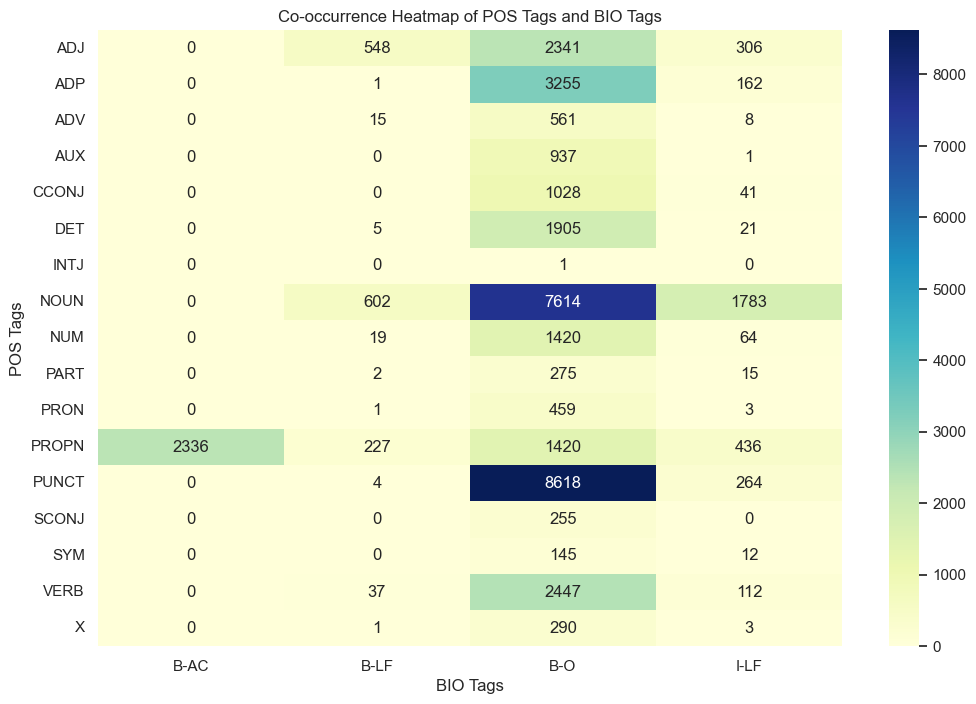

In [15]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Flatten the list of pos_tags and ner_tags from all sentences in the training set
pos_tags = [pos for sublist in dataset['train']['pos_tags'] for pos in sublist]
ner_tags = [tag for sublist in dataset['train']['ner_tags'] for tag in sublist]

# Create a co-occurrence matrix
co_occurrence = pd.crosstab(pd.Series(pos_tags, name='POS Tags'), pd.Series(ner_tags, name='BIO Tags'))

# Now plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Co-occurrence Heatmap of POS Tags and BIO Tags')
plt.show()


# EXPERIMENT 1

## Exploratory Data Analysis with Bigram and Trigram Tokenization, Utilizing CountVectorizer for Vectorization, and Model Application


In [16]:
!pip install datasets

The code explains the effectiveness of different tokenization methods, specifically bigram and trigram tokenization, in a Named Entity Recognition (NER) task. It starts by loading a dataset designed for NER, extracting tokens and their corresponding NER tags. Then, it generates bigrams and trigrams from the token sequences, aligning them with their respective NER tags. CountVectorizers are employed to convert bigrams and trigrams into matrices of token counts. Logistic Regression models are trained on the TF-IDF vectorized corpus and subsequently applied to make predictions on the test sets. The script concludes by visualizing the performance of bigrams and trigrams using confusion matrices and bar graphs for precision, recall, and F1 scores.

C:\Users\hward\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hward\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hward\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hward\anaconda3\Lib\site-packag

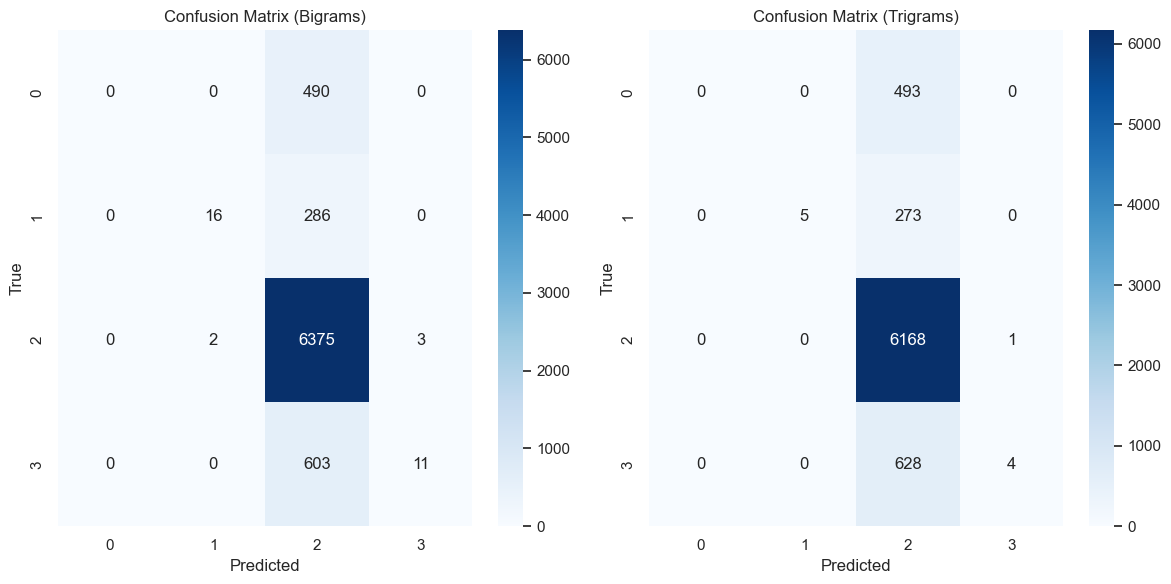

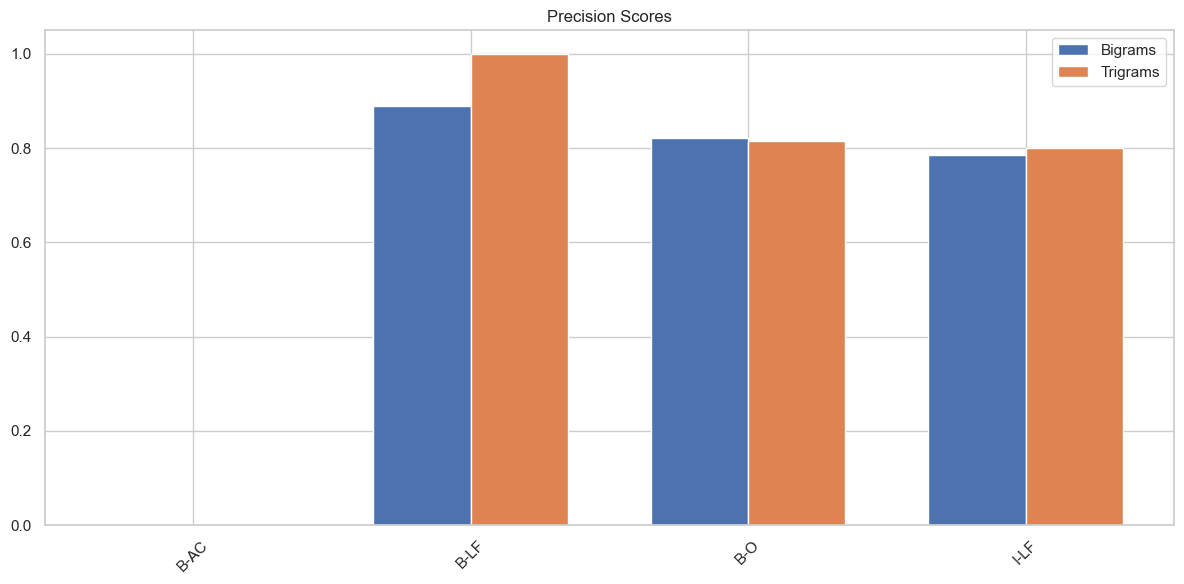

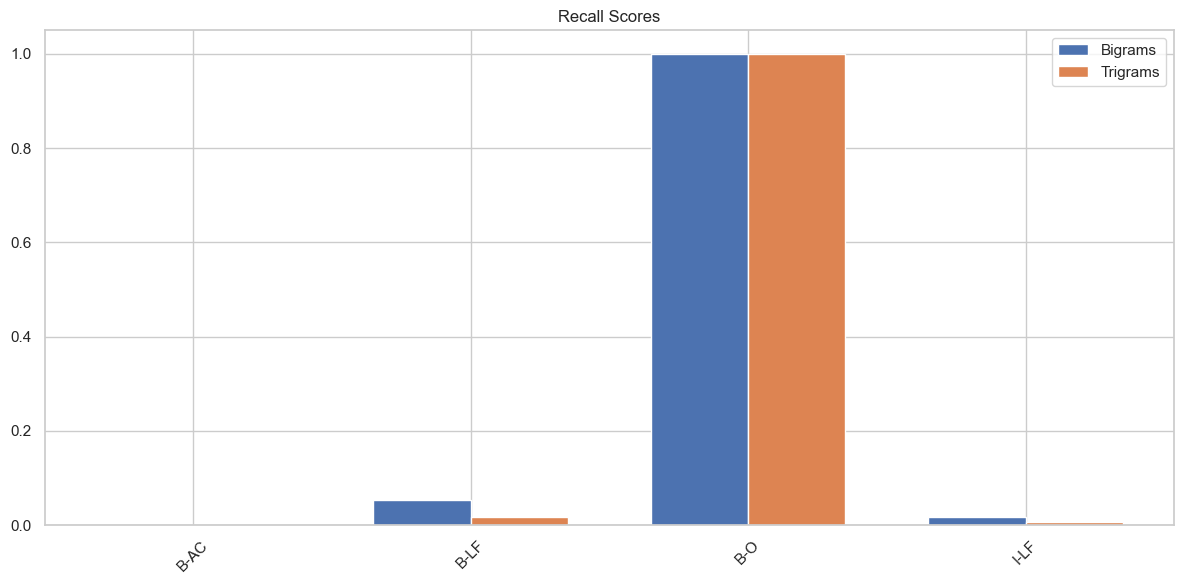

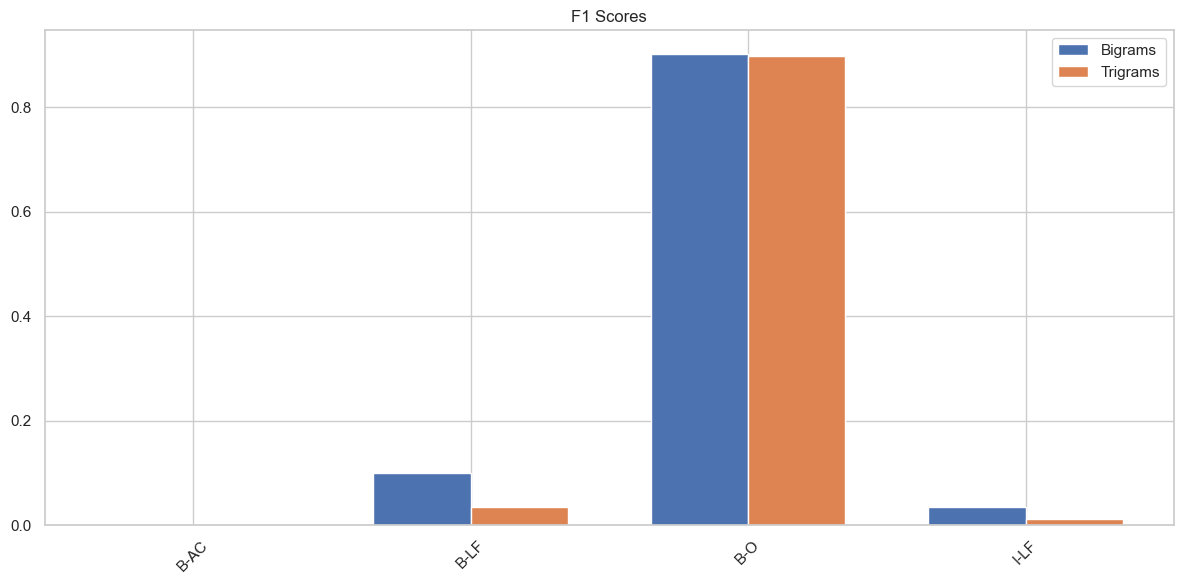

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from datasets import load_dataset

dataset = load_dataset("surrey-nlp/PLOD-CW")

# Assuming your dataset is loaded into a variable called 'dataset'
tokens = dataset['train']['tokens']
ner_tags = dataset['train']['ner_tags']

# Extract bigrams and trigrams from the tokens and align with ner_tags
bigrams = []
trigrams = []
labels_bigrams = []
labels_trigrams = []

for sentence_tokens, sentence_tags in zip(tokens, ner_tags):
    sentence_bigrams = list(ngrams(sentence_tokens, 2))
    sentence_trigrams = list(ngrams(sentence_tokens, 3))

    bigrams.extend([' '.join(bigram) for bigram in sentence_bigrams])
    trigrams.extend([' '.join(trigram) for trigram in sentence_trigrams])

    labels_bigrams.extend(sentence_tags[:len(sentence_bigrams)])
    labels_trigrams.extend(sentence_tags[:len(sentence_trigrams)])

# Create CountVectorizers for bigrams and trigrams
bigram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
trigram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(3, 3))

# Convert bigrams and trigrams into matrices of token counts
X_bigrams = bigram_vectorizer.fit_transform(bigrams)
X_trigrams = trigram_vectorizer.fit_transform(trigrams)

# Split the data into training and testing sets
X_train_bigrams, X_test_bigrams, y_train_bigrams, y_test_bigrams = train_test_split(X_bigrams, labels_bigrams, test_size=0.2, random_state=42)
X_train_trigrams, X_test_trigrams, y_train_trigrams, y_test_trigrams = train_test_split(X_trigrams, labels_trigrams, test_size=0.2, random_state=42)

# Train logistic regression models for bigrams and trigrams
model_bigrams = LogisticRegression()
model_bigrams.fit(X_train_bigrams, y_train_bigrams)

model_trigrams = LogisticRegression()
model_trigrams.fit(X_train_trigrams, y_train_trigrams)

# Make predictions on the test sets
y_pred_bigrams = model_bigrams.predict(X_test_bigrams)
y_pred_trigrams = model_trigrams.predict(X_test_trigrams)

# Create confusion matrices for bigrams and trigrams
cm_bigrams = confusion_matrix(y_test_bigrams, y_pred_bigrams)
cm_trigrams = confusion_matrix(y_test_trigrams, y_pred_trigrams)

# Generate classification reports for bigrams and trigrams
report_bigrams = classification_report(y_test_bigrams, y_pred_bigrams, output_dict=True)
report_trigrams = classification_report(y_test_trigrams, y_pred_trigrams, output_dict=True)

# Visualize confusion matrices using heatmaps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_bigrams, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Bigrams)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1, 2, 2)
sns.heatmap(cm_trigrams, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Trigrams)')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# Visualize metrics using bar graphs
metrics = ['precision', 'recall', 'f1-score']
classes = list(report_bigrams.keys())[:-3]  # Exclude 'micro avg', 'macro avg', and 'weighted avg'

bigram_scores = [report_bigrams[cls] for cls in classes]
trigram_scores = [report_trigrams[cls] for cls in classes]

x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, [score['precision'] for score in bigram_scores], width, label='Bigrams')
ax.bar(x + width/2, [score['precision'] for score in trigram_scores], width, label='Trigrams')

ax.set_title('Precision Scores')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, [score['recall'] for score in bigram_scores], width, label='Bigrams')
ax.bar(x + width/2, [score['recall'] for score in trigram_scores], width, label='Trigrams')

ax.set_title('Recall Scores')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, [score['f1-score'] for score in bigram_scores], width, label='Bigrams')
ax.bar(x + width/2, [score['f1-score'] for score in trigram_scores], width, label='Trigrams')

ax.set_title('F1 Scores')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

Visualizing Accuracy of Bigram and Trigram Tokenization in Named Entity Recognition





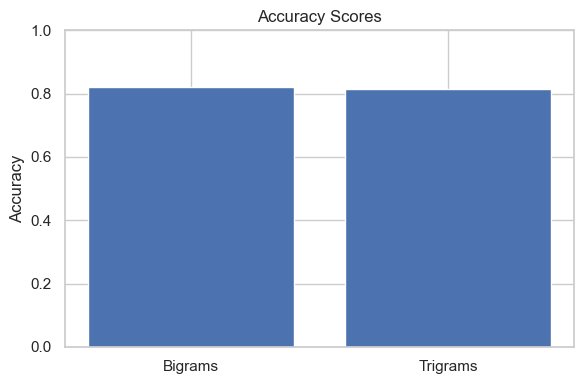

In [18]:
bigram_accuracy = report_bigrams['accuracy']
trigram_accuracy = report_trigrams['accuracy']

# Visualize accuracy using a bar graph
fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(['Bigrams', 'Trigrams'], [bigram_accuracy, trigram_accuracy])

ax.set_title('Accuracy Scores')
ax.set_ylim(0, 1)
ax.set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

# EXPERIMENT 2

## Evaluating Named Entity Recognition Using Two Vectorization Methods: TF-IDF and Word2Vec, and One Algorithm: Conditional Random Fields (CRF)

In [21]:
!pip install sklearn_crfsuite

  Obtaining dependency information for sklearn_crfsuite from https://files.pythonhosted.org/packages/25/74/5b7befa513482e6dee1f3dd68171a6c9dfc14c0eaa00f885ffeba54fe9b0/sklearn_crfsuite-0.3.6-py2.py3-none-any.whl.metadata
  Obtaining dependency information for python-crfsuite>=0.8.3 from https://files.pythonhosted.org/packages/78/cd/8fe34205c01101b0e8dc1a18c92b3b932ab7b246daf0399072ddb551e109/python_crfsuite-0.9.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tabulate from https://files.pythonhosted.org/packages/40/44/4a5f08c96eb108af5cb50b41f76142f0afa346dfa99d5296fe7202a11854/tabulate-0.9.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/155.8 kB ? eta -:--:--
   ---------------------------------------- 155.8/155.8 kB 4.7 MB/s eta 0:00:00


This code snippet demonstrates the process of evaluating Named Entity Recognition (NER) using TF-IDF vectorization and a Conditional Random Fields (CRF) algorithm. It begins by loading a dataset specifically designed for NER tasks and extracting token sequences, part-of-speech (POS) tags, and NER tags from the training split. The token sequences are then flattened and transformed into TF-IDF features, which are combined with POS tags to prepare the training data for the CRF model. After initializing and fitting the CRF model, predictions are made on the training data, and various evaluation metrics such as accuracy, precision, recall, and F1 score are computed. Additionally, a confusion matrix is visualized to assess the model's classification performance. Overall, the code illustrates a comprehensive approach to training and evaluating a CRF model for NER using TF-IDF features.

<Figure size 800x600 with 0 Axes>

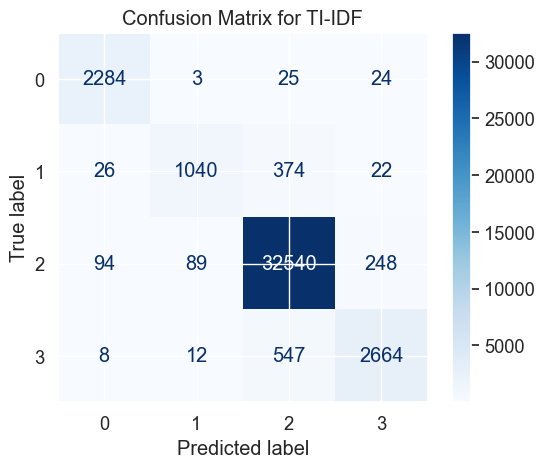

Accuracy for CRF model using TF-IDF features: 0.9632
Precision for CRF model using TF-IDF features: 0.9622634816907107
Recall for CRF model using TF-IDF features: 0.9632
F1 Score for CRF model using TF-IDF features: 0.9620923402032244


In [33]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn_crfsuite import CRF
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for controlling color palettes

# Load the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Extract token sequences, POS tags, and NER tags
tokens = dataset['train']['tokens']
pos_tags = dataset['train']['pos_tags']
ner_tags = dataset['train']['ner_tags']

# Flatten token sequences for TF-IDF calculation
flattened_tokens = [" ".join(token_seq) for token_seq in tokens]

# Compute TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(flattened_tokens)

# Prepare CRF training data with TF-IDF features and POS tags
X_train = []
y_train = []
for i, token_seq in enumerate(tokens):
    if len(token_seq) == len(ner_tags[i]):
        # Create a dictionary of features with TF-IDF and POS
        features = [{"token": token, "pos": pos_tags[i][j], "tfidf": tfidf_features[i, j]} for j, token in enumerate(token_seq)]
        X_train.append(features)
        y_train.append(ner_tags[i])

# Initialize and fit the CRF model
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)

# Fit the CRF model
crf.fit(X_train, y_train)

# Make predictions
y_pred = crf.predict(X_train)

# Flatten sequences for metrics calculation
y_train_flat = [item for sublist in y_train for item in sublist]
y_pred_flat = [item for sublist in y_pred for item in sublist]

# Display confusion matrix in shades of blue
conf_matrix = confusion_matrix(y_train_flat, y_pred_flat)

# Create a custom colormap with shades of blue
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')  # Use 'Blues' colormap
plt.title('Confusion Matrix for TI-IDF')
plt.show()

# Calculate additional metrics
accuracy = accuracy_score(y_train_flat, y_pred_flat)
precision = precision_score(y_train_flat, y_pred_flat, average='weighted')
recall = recall_score(y_train_flat, y_pred_flat, average='weighted')
f1 = f1_score(y_train_flat, y_pred_flat, average='weighted')

print("Accuracy for CRF model using TF-IDF features:", accuracy)
print("Precision for CRF model using TF-IDF features:", precision)
print("Recall for CRF model using TF-IDF features:", recall)
print("F1 Score for CRF model using TF-IDF features:", f1)


In [24]:
# Install gensim for Word2Vec functionality
!pip install gensim


This code segment showcases the application of Word2Vec embeddings in Named Entity Recognition (NER) tasks using a Conditional Random Fields (CRF) algorithm. It starts by loading a dataset tailored for NER and extracting token sequences, part-of-speech (POS) tags, and NER tags from the training split. Next, a Word2Vec model is trained on the token sequences. The CRF training data is prepared by combining POS tags with Word2Vec features extracted from the trained model. After initializing and fitting the CRF model, predictions are made on the training data. Evaluation metrics including accuracy, precision, recall, and F1 score are computed, and a confusion matrix is visualized to assess the model's performance. Overall, this code illustrates the integration of Word2Vec embeddings with CRF for NER tasks and evaluates the model's effectiveness using various metrics.

<Figure size 800x600 with 0 Axes>

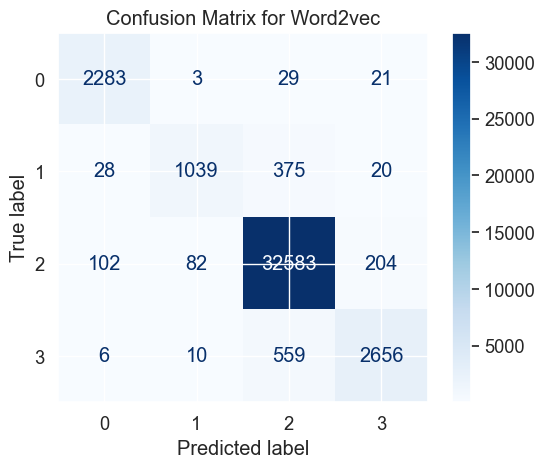

Accuracy for CRF model using Word2Vec features: 0.964025
Precision for CRF model using Word2Vec features: 0.9631706293935586
Recall for CRF model using Word2Vec features: 0.964025
F1 Score for CRF model using Word2Vec features: 0.9628425013303872


In [34]:
import gensim
from gensim.models import Word2Vec
from sklearn_crfsuite import CRF
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for controlling color palettes
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Extract token sequences, POS tags, and NER tags
tokens = dataset['train']['tokens']
pos_tags = dataset['train']['pos_tags']
ner_tags = dataset['train']['ner_tags']

# Train a Word2Vec model on the token sequences
w2v_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4)

# Prepare CRF training data with Word2Vec features and POS tags
X_train = []
y_train = []
for i, token_seq in enumerate(tokens):
    if len(token_seq) == len(ner_tags[i]):
        # Create a dictionary of features with POS tags and Word2Vec
        features = [{"token": token, "pos": pos_tags[i][j], **{f"w2v_{k}": w2v_model.wv[token][k] for k in range(100)}} for j, token in enumerate(token_seq)]
        X_train.append(features)
        y_train.append(ner_tags[i])

# Initialize and fit the CRF model
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)

# Fit the CRF model
crf.fit(X_train, y_train)

# Make predictions
y_pred = crf.predict(X_train)

# Flatten sequences for metrics calculation
y_train_flat = [item for sublist in y_train for item in sublist]
y_pred_flat = [item for sublist in y_pred for item in sublist]

# Display confusion matrix in shades of blue
conf_matrix = confusion_matrix(y_train_flat, y_pred_flat)

# Create a custom colormap with shades of blue
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')  # Use 'Blues' colormap
plt.title('Confusion Matrix for Word2vec')
plt.show()

# Calculate additional metrics
accuracy = accuracy_score(y_train_flat, y_pred_flat)
precision = precision_score(y_train_flat, y_pred_flat, average='weighted')
recall = recall_score(y_train_flat, y_pred_flat, average='weighted')
f1 = f1_score(y_train_flat, y_pred_flat, average='weighted')

print("Accuracy for CRF model using Word2Vec features:", accuracy)
print("Precision for CRF model using Word2Vec features:", precision)
print("Recall for CRF model using Word2Vec features:", recall)
print("F1 Score for CRF model using Word2Vec features:", f1)


# EXPERIMENT 3


## Evaluating Named Entity Recognition (NER) tags column using vectorization (TF-IDF), and model implementation of Support Vector Machines (SVM) and Conditional Random Fields (CRF).

Data Flattening: Transforming a dataset with tokenized text into a simpler structure by concatenating tokens within each list.  
Split-Based Processing: Applying the flattening process to multiple dataset splits (train, validation, test).  
Verification Output: Displaying a sample of the flattened data to ensure proper transformation.

In [25]:
# Flattening function to convert a list of lists into a list of strings
def flatten_dataset(data):
    return [" ".join(sentence) for sentence in data]

# Apply the flattening function to each split of the dataset
train_data = flatten_dataset(dataset['train']['tokens'])
validation_data = flatten_dataset(dataset['validation']['tokens'])
test_data = flatten_dataset(dataset['test']['tokens'])

print("Flattened Train Data:", train_data[:5])  # Display first 5 for confirmation
print("Flattened Validation Data:", validation_data[:5])
print("Flattened Test Data:", test_data[:5])


Flattened Train Data: ['For this purpose the Gothenburg Young Persons Empowerment Scale ( GYPES ) was developed .', 'The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) .', 'Minor H antigen alloimmune responses readily occur in the setting of human leukocyte antigen ( HLA)–matched allogeneic solid organ and stem cell transplantation ( SCT ) [ 3,4 ] .', 'EPI = Echo planar imaging .', 'Furthermore , eNOS - derived NO S - nitrosylated β - actin on Cys374 and impaired actin binding to profilin-1 ( PFN1 ) , as confirmed with the transnitrosylating agent S - nitroso - L - cysteine ( Cys-NO ) .']
Flattened Validation Data: ['= Manual Ability Classification System ; QUEST = Quest - Quality of upper extremity skills test ; Cont = control ; M = male , F = female , V = verbal , nonV = non - Verbal ,

This code segment utilizes TF-IDF vectorization to convert text data into numerical vectors suitable for machine learning. It initializes the TF-IDF vectorizer, fits it to the training data, and transforms validation and test data accordingly. Finally, it prints the shapes of the vectorized datasets to confirm the transformation.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data, then transform validation and test data
X_train = tfidf_vectorizer.fit_transform(train_data)
X_validation = tfidf_vectorizer.transform(validation_data)
X_test = tfidf_vectorizer.transform(test_data)

print("TF-IDF Vectorized Train Data Shape:", X_train.shape)
print("TF-IDF Vectorized Validation Data Shape:", X_validation.shape)
print("TF-IDF Vectorized Test Data Shape:", X_test.shape)


TF-IDF Vectorized Train Data Shape: (1072, 7869)
TF-IDF Vectorized Validation Data Shape: (126, 7869)
TF-IDF Vectorized Test Data Shape: (153, 7869)


In [27]:
# Install necessary libraries
!pip install datasets sklearn_crfsuite matplotlib


This extracts token sequences, part-of-speech (POS) tags, and NER tags from the training split. TF-IDF vectorization is applied to transform token sequences into numerical features. These features, combined with POS tags, are used to train a Conditional Random Fields (CRF) model. The model's performance is evaluated using metrics like accuracy, precision, recall, and F1 score, with visualization provided through a confusion matrix.





<Figure size 800x600 with 0 Axes>

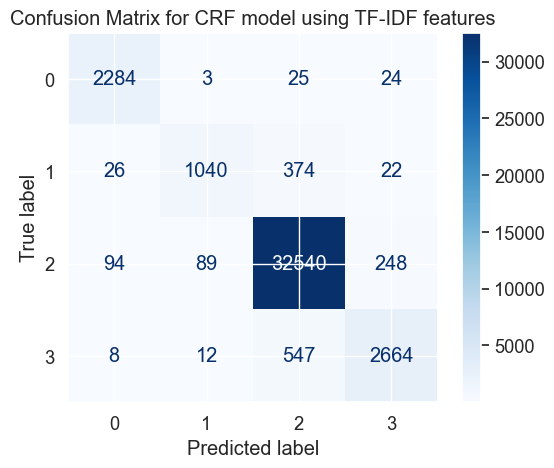

Accuracy for CRF model using TF-IDF features: 0.9632
Precision CRF model using TF-IDF features: 0.9622634816907107
Recall CRF model using TF-IDF features: 0.9632
F1 Score CRF model using TF-IDF features: 0.9620923402032244


In [3]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn_crfsuite import CRF
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns  # Optional, for controlling color palettes

# Load the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Extract token sequences, POS tags, and NER tags
tokens = dataset['train']['tokens']
pos_tags = dataset['train']['pos_tags']
ner_tags = dataset['train']['ner_tags']

# Flatten token sequences for TF-IDF calculation
flattened_tokens = [" ".join(token_seq) for token_seq in tokens]

# Compute TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(flattened_tokens)

# Prepare CRF training data with TF-IDF features and POS tags
X_train = []
y_train = []
for i, token_seq in enumerate(tokens):
    if len(token_seq) == len(ner_tags[i]):
        # Create a dictionary of features with TF-IDF and POS
        features = [{"token": token, "pos": pos_tags[i][j], "tfidf": tfidf_features[i, j]} for j, token in enumerate(token_seq)]
        X_train.append(features)
        y_train.append(ner_tags[i])

# Initialize and fit the CRF model
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
)

# Fit the CRF model
crf.fit(X_train, y_train)

# Make predictions
y_pred = crf.predict(X_train)

# Flatten sequences for metrics calculation
y_train_flat = [item for sublist in y_train for item in sublist]
y_pred_flat = [item for sublist in y_pred for item in sublist]

# Display confusion matrix in shades of blue
conf_matrix = confusion_matrix(y_train_flat, y_pred_flat)

# Create a custom colormap with shades of blue
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')  # Use 'Blues' colormap
plt.title('Confusion Matrix for CRF model using TF-IDF features')
plt.show()

# Calculate additional metrics
accuracy = accuracy_score(y_train_flat, y_pred_flat)
precision = precision_score(y_train_flat, y_pred_flat, average='weighted')
recall = recall_score(y_train_flat, y_pred_flat, average='weighted')
f1 = f1_score(y_train_flat, y_pred_flat, average='weighted')

print("Accuracy for CRF model using TF-IDF features:", accuracy)
print("Precision CRF model using TF-IDF features:", precision)
print("Recall CRF model using TF-IDF features:", recall)
print("F1 Score CRF model using TF-IDF features:", f1)


This part of code demonstrates the application of a Linear Support Vector Machine (SVM) for Named Entity Recognition (NER) tasks using TF-IDF vectorization. It begins by loading a dataset specifically designed for NER and extracting token sequences along with their corresponding NER tags from the training split. The token sequences are converted into text format and aligned with the NER tags. Next, a pipeline is constructed with TF-IDF vectorization and a Linear SVM classifier. The SVM model is trained on the TF-IDF vectorized corpus, and predictions are made. A confusion matrix is visualized to assess the model's classification performance, and additional metrics such as accuracy, precision, recall, and F1 score are computed.

C:\Users\hward\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

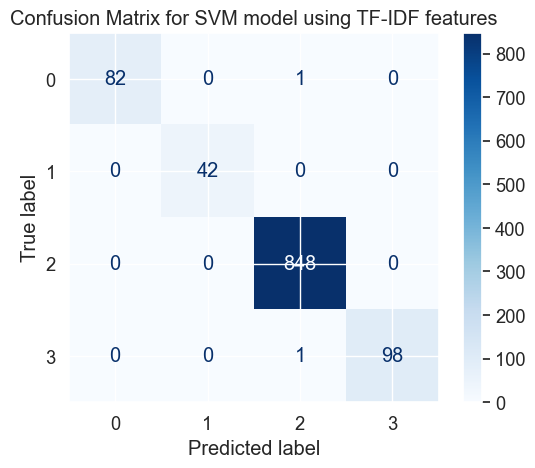

Accuracy SVM model using TF-IDF features: 0.9981343283582089
Precision SVM model using TF-IDF features: 0.9981387181738367
Recall SVM model using TF-IDF features: 0.9981343283582089
F1 Score SVM model using TF-IDF features: 0.9981302327259378


In [7]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for setting color palette

# Load the dataset
dataset = load_dataset("surrey-nlp/PLOD-CW")

# Extract token sequences and NER tags
tokens = dataset['train']['tokens']
ner_tags = dataset['train']['ner_tags']

# Convert token sequences to text for TF-IDF
corpus = [" ".join(token_seq) for token_seq in tokens if len(token_seq) == len(ner_tags[tokens.index(token_seq)])]

# Align y_train with corpus length
y_train = [tag for seq in ner_tags for tag in seq][:len(corpus)]

# Use a pipeline with TfidfVectorizer and LinearSVC
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Converts text to TF-IDF features
    ('svm', LinearSVC(max_iter=1000))  # Linear SVM classifier
])

# Fit the SVM model with the TF-IDF vectorized corpus
pipeline.fit(corpus, y_train)

# Make predictions
y_pred = pipeline.predict(corpus)

# Display confusion matrix in shades of blue
conf_matrix = confusion_matrix(y_train, y_pred)

plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
sns.set(font_scale=1.2)  # Adjust font scale for better readability
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='Blues')  # Use 'Blues' colormap to get shades of blue
plt.title("Confusion Matrix for SVM model using TF-IDF features")
plt.show()

# Calculate additional metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')

print("Accuracy SVM model using TF-IDF features:", accuracy)
print("Precision SVM model using TF-IDF features:", precision)
print("Recall SVM model using TF-IDF features:", recall)
print("F1 Score SVM model using TF-IDF features:", f1)




# EXPERIMENT 4


Fine tunning ROBERTa cpmpared it with distilled Roberta

In [ ]:
# Install necessary dependencies
!pip install datasets
!pip install transformers
!pip install spacy
!pip install torch
!pip install spacy-transformers
!pip install transformers[torch]
!pip install seqeval

In [ ]:
from datasets import load_dataset, load_metric
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from transformers import DataCollatorForTokenClassification
import numpy as np
from seqeval.metrics import classification_report, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch



This code fine-tunes a pre-trained RoBERTa model for the task of named entity recognition (NER) on the PLOD dataset, specifically to detect abbreviations and their long-form expansions.

It starts by loading the dataset and the necessary libraries. Then, it tokenizes the input sentences and encodes the NER labels. The labels are aligned with the tokens, and the data is preprocessed into the required format for training.

The code defines a custom metric function and sets up the training arguments. It initializes the RoBERTa model for token classification and creates a Trainer object from the Hugging Face Transformers library.

The Trainer is used to fine-tune the model on the training data, with early stopping based on the model's performance on the validation set.

Finally, the fine-tuned model is evaluated on the test dataset, and the performance metrics (precision, recall, F1-score, and accuracy) are computed and displayed.

The goal is to train the RoBERTa model to accurately detect abbreviations and their long-forms in text, enabling its use for tasks like information extraction and scientific document understanding.

In [ ]:


from datasets import load_dataset, load_metric
dataset = load_dataset("surrey-nlp/PLOD-CW")

from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("roberta-base", add_prefix_space=True)
model = AutoModelForTokenClassification.from_pretrained("roberta-base", num_labels=4)

short_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

tokenized_input = tokenizer(short_dataset["tokens"], is_split_into_words=True)

# Example single sentence example.
for token in tokenized_input["input_ids"]:
    print(tokenizer.convert_ids_to_tokens(token))
    break

label_encoding = {"B-O": 0, "B-AC": 1, "B-LF": 2, "I-LF": 3}

label_list = []
for sample in short_dataset["ner_tags"]:
    label_list.append([label_encoding[tag] for tag in sample])

val_label_list = []
for sample in val_dataset["ner_tags"]:
    val_label_list.append([label_encoding[tag] for tag in sample])

test_label_list = []
for sample in test_dataset["ner_tags"]:
    test_label_list.append([label_encoding[tag] for tag in sample])

def tokenize_and_align_labels(short_dataset, list_name):
    tokenized_inputs = tokenizer(short_dataset["tokens"], truncation=True, is_split_into_words=True) ## For some models, you may need to set max_length to approximately 500.

    labels = []
    for i, label in enumerate(list_name):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_datasets = tokenize_and_align_labels(short_dataset, label_list)
tokenized_val_datasets = tokenize_and_align_labels(val_dataset, val_label_list)
tokenized_test_datasets = tokenize_and_align_labels(test_dataset, test_label_list)
# print(tokenized_datasets)


# RoBERTa's tokenizer returns the dataset in the form of a dictionary of lists (sentences).
# we have to convert it into a list of dictionaries for training.
def turn_dict_to_list_of_dict(d):
    new_list = []

    for labels, inputs in zip(d["labels"], d["input_ids"]):
        entry = {"input_ids": inputs, "labels": labels}
        new_list.append(entry)

    return new_list


tokenised_train = turn_dict_to_list_of_dict(tokenized_datasets)
tokenised_val = turn_dict_to_list_of_dict(tokenized_val_datasets)
tokenised_test = turn_dict_to_list_of_dict(tokenized_test_datasets)

from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer)

import numpy as np

metric = load_metric("seqeval")
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

# Training arguments (feel free to play arround with these values)
model_name = "roberta-base"
epochs = 6
batch_size = 4
learning_rate = 2e-5

args = TrainingArguments(
    f"RoBERTa-finetuned-NER",
    # evaluation_strategy = "epoch", ## Instead of focusing on loss and accuracy, we will focus on the F1 score
    evaluation_strategy ='steps',
    eval_steps = 7000,
    save_total_limit = 3,
    learning_rate=learning_rate,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=epochs,
    weight_decay=0.001,
    save_steps=35000,
    metric_for_best_model = 'f1',
    load_best_model_at_end=True
)

trainer = Trainer(
    model,
    args,
    train_dataset=tokenised_train,
    eval_dataset=tokenised_val,
    data_collator = data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer.train()

# Prepare the test data for evaluation in the same format as the training data

predictions, labels, _ = trainer.predict(tokenised_test)
predictions = np.argmax(predictions, axis=2)

# Remove the predictions for the [CLS] and [SEP] tokens
true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]
true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(predictions, labels)
]

# Compute multiple metrics on the test restuls
results = metric.compute(predictions=true_predictions, references=true_labels)
results



This code trains and evaluates both the original RoBERTa model and its distilled variant (DistilRoBERTa) on the task of named entity recognition for detecting abbreviations and long-forms in the PLOD dataset. It preprocesses the data, sets up training arguments, trains the models separately, and then evaluates their performance on the test set using metrics like precision, recall, F1-score, and accuracy. Finally, it prints the evaluation results for both models, allowing for a direct comparison of their performance on this task.

In [ ]:
# Original RoBERTa model
roberta_model = "roberta-base"
# Distilled RoBERTa model
distil_roberta_model = "distilroberta-base"

# Original RoBERTa tokenizer
tokenizer = AutoTokenizer.from_pretrained(roberta_model, add_prefix_space=True)
# Distilled RoBERTa tokenizer
distil_tokenizer = AutoTokenizer.from_pretrained(distil_roberta_model, add_prefix_space=True)

# Original RoBERTa model
model = AutoModelForTokenClassification.from_pretrained(roberta_model, num_labels=4)
# Distilled RoBERTa model
distil_model = AutoModelForTokenClassification.from_pretrained(distil_roberta_model, num_labels=4)

short_dataset = dataset["train"][:200]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

# Original RoBERTa tokenizer
tokenized_input = tokenizer(short_dataset["tokens"], is_split_into_words=True)
# Distilled RoBERTa tokenizer
distil_tokenized_input = distil_tokenizer(short_dataset["tokens"], is_split_into_words=True)

# Example single sentence example for original RoBERTa
for token in tokenized_input["input_ids"]:
    print(tokenizer.convert_ids_to_tokens(token))
    break

# Example single sentence example for distilled RoBERTa
for token in distil_tokenized_input["input_ids"]:
    print(distil_tokenizer.convert_ids_to_tokens(token))
    break

label_encoding = {"B-O": 0, "B-AC": 1, "B-LF": 2, "I-LF": 3}

label_list = []
for sample in short_dataset["ner_tags"]:
    label_list.append([label_encoding[tag] for tag in sample])

val_label_list = []
for sample in val_dataset["ner_tags"]:
    val_label_list.append([label_encoding[tag] for tag in sample])

test_label_list = []
for sample in test_dataset["ner_tags"]:
    test_label_list.append([label_encoding[tag] for tag in sample])

def tokenize_and_align_labels(short_dataset, list_name, tokenizer):
    tokenized_inputs = tokenizer(short_dataset["tokens"], truncation=True, is_split_into_words=True) ## For some models, you may need to set max_length to approximately 500.

    labels = []
    for i, label in enumerate(list_name):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            # Special tokens have a word id that is None. We set the label to -100 so they are automatically
            # ignored in the loss function.
            if word_idx is None:
                label_ids.append(-100)
            # We set the label for the first token of each word.
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            # For the other tokens in a word, we set the label to either the current label or -100, depending on
            # the label_all_tokens flag.
            else:
                label_ids.append(label[word_idx])
            previous_word_idx = word_idx

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

tokenized_datasets = tokenize_and_align_labels(short_dataset, label_list, tokenizer)
distil_tokenized_datasets = tokenize_and_align_labels(short_dataset, label_list, distil_tokenizer)
tokenized_val_datasets = tokenize_and_align_labels(val_dataset, val_label_list, tokenizer)
distil_tokenized_val_datasets = tokenize_and_align_labels(val_dataset, val_label_list, distil_tokenizer)
tokenized_test_datasets = tokenize_and_align_labels(test_dataset, test_label_list, tokenizer)
distil_tokenized_test_datasets = tokenize_and_align_labels(test_dataset, test_label_list, distil_tokenizer)

def turn_dict_to_list_of_dict(d):
    new_list = []

    for labels, inputs in zip(d["labels"], d["input_ids"]):
        entry = {"input_ids": inputs, "labels": labels}
        new_list.append(entry)

    return new_list


tokenised_train = turn_dict_to_list_of_dict(tokenized_datasets)
distil_tokenised_train = turn_dict_to_list_of_dict(distil_tokenized_datasets)
tokenised_val = turn_dict_to_list_of_dict(tokenized_val_datasets)
distil_tokenised_val = turn_dict_to_list_of_dict(distil_tokenized_val_datasets)
tokenised_test = turn_dict_to_list_of_dict(tokenized_test_datasets)
distil_tokenised_test = turn_dict_to_list_of_dict(distil_tokenized_test_datasets)

from transformers import DataCollatorForTokenClassification
data_collator = DataCollatorForTokenClassification(tokenizer)
distil_data_collator = DataCollatorForTokenClassification(distil_tokenizer)

import numpy as np

metric = load_metric("seqeval")
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=2)

    # Remove ignored index (special tokens)
    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)
    return {
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"],
        "accuracy": results["overall_accuracy"],
    }

from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

# Training arguments for Original RoBERTa (feel free to play around with these values)
roberta_epochs = 6
roberta_batch_size = 4
roberta_learning_rate = 2e-5

roberta_args = TrainingArguments(
    f"RoBERTa-finetuned-NER",
    evaluation_strategy ='steps',
    eval_steps = 7000,
    save_total_limit = 3,
    learning_rate=roberta_learning_rate,
    per_device_train_batch_size=roberta_batch_size,
    per_device_eval_batch_size=roberta_batch_size,
    num_train_epochs=roberta_epochs,
    weight_decay=0.001,
    save_steps=35000,
    metric_for_best_model = 'f1',
    load_best_model_at_end=True
)

roberta_trainer = Trainer(
    model,
    roberta_args,
    train_dataset=tokenised_train,
    eval_dataset=tokenised_val,
    data_collator = data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)

roberta_trainer.train()

# Training arguments for Distilled RoBERTa (feel free to play around with these values)
distil_roberta_epochs = 6
distil_roberta_batch_size = 4
distil_roberta_learning_rate = 2e-5

distil_roberta_args = TrainingArguments(
    f"Distilled-RoBERTa-finetuned-NER",
    evaluation_strategy ='steps',
    eval_steps = 7000,
    save_total_limit = 3,
    learning_rate=distil_roberta_learning_rate,
    per_device_train_batch_size=distil_roberta_batch_size,
    per_device_eval_batch_size=distil_roberta_batch_size,
    num_train_epochs=distil_roberta_epochs,
    weight_decay=0.001,
    save_steps=35000,
    metric_for_best_model = 'f1',
    load_best_model_at_end=True
)

distil_roberta_trainer = Trainer(
    distil_model,
    distil_roberta_args,
    train_dataset=distil_tokenised_train,
    eval_dataset=distil_tokenised_val,
    data_collator = distil_data_collator,
    tokenizer=distil_tokenizer,
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=3)]
)

distil_roberta_trainer.train()

# Evaluate both models on the test set

# Original RoBERTa
roberta_predictions, roberta_labels, _ = roberta_trainer.predict(tokenised_test)
roberta_predictions = np.argmax(roberta_predictions, axis=2)

# Distilled RoBERTa
distil_roberta_predictions, distil_roberta_labels, _ = distil_roberta_trainer.predict(distil_tokenised_test)
distil_roberta_predictions = np.argmax(distil_roberta_predictions, axis=2)

# Remove the predictions for the [CLS] and [SEP] tokens for Original RoBERTa
roberta_true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(roberta_predictions, roberta_labels)
]
roberta_true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(roberta_predictions, roberta_labels)
]

# Remove the predictions for the [CLS] and [SEP] tokens for Distilled RoBERTa
distil_roberta_true_predictions = [
    [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(distil_roberta_predictions, distil_roberta_labels)
]
distil_roberta_true_labels = [
    [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
    for prediction, label in zip(distil_roberta_predictions, distil_roberta_labels)
]

# Compute multiple metrics on the test results for Original RoBERTa
roberta_results = metric.compute(predictions=roberta_true_predictions, references=roberta_true_labels)

# Compute multiple metrics on the test results for Distilled RoBERTa
distil_roberta_results = metric.compute(predictions=distil_roberta_true_predictions, references=distil_roberta_true_labels)

# Print results for comparison
print("Results for Original RoBERTa:")
print(roberta_results)
print("\nResults for Distilled RoBERTa:")
print(distil_roberta_results)

This code snippet compares the performance metrics of two Named Entity Recognition (NER) models, Original RoBERTa and Distilled RoBERTa, using precision, recall, F1-score, and accuracy. It extracts these metrics from the results of each model and then plots them side by side using Matplotlib. The bar plot visually illustrates the comparison of the metrics for the two models, helping to analyze their relative performance in NER tasks.

In [ ]:
import matplotlib.pyplot as plt

# Extract metrics
roberta_precision = roberta_results['overall_precision']
roberta_recall = roberta_results['overall_recall']
roberta_f1 = roberta_results['overall_f1']
roberta_accuracy = roberta_results['overall_accuracy']

distil_roberta_precision = distil_roberta_results['overall_precision']
distil_roberta_recall = distil_roberta_results['overall_recall']
distil_roberta_f1 = distil_roberta_results['overall_f1']
distil_roberta_accuracy = distil_roberta_results['overall_accuracy']

# Plotting
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
roberta_metrics = [roberta_precision, roberta_recall, roberta_f1, roberta_accuracy]
distil_roberta_metrics = [distil_roberta_precision, distil_roberta_recall, distil_roberta_f1, distil_roberta_accuracy]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar([i - width/2 for i in x], roberta_metrics, width, label='Original RoBERTa')
rects2 = ax.bar([i + width/2 for i in x], distil_roberta_metrics, width, label='Distilled RoBERTa')

ax.set_ylabel('Scores')
ax.set_title('Comparison of NER Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


This code snippet compares various characteristics of two Named Entity Recognition (NER) models: Original RoBERTa and Distilled RoBERTa. It measures and compares the following metrics:

Training Time: It measures the time taken to train each model.
Model Size: It calculates the total number of parameters in each model.
Inference Speed: It measures the time taken for inference on a test dataset.
Resource Efficiency (Inference): This metric evaluates the CPU and memory usage during inference, which may require additional profiling tools or system monitoring.

In [ ]:
import time

# 1. Training Time
start_time = time.time()
roberta_trainer.train()
roberta_training_time = time.time() - start_time

start_time = time.time()
distil_roberta_trainer.train()
distil_roberta_training_time = time.time() - start_time

# 2. Model Size
roberta_model_size = sum(p.numel() for p in model.parameters())
distil_roberta_model_size = sum(p.numel() for p in distil_model.parameters())

# 3. Inference Speed
start_time = time.time()
roberta_predictions, _, _ = roberta_trainer.predict(tokenised_test)
roberta_inference_time = time.time() - start_time

start_time = time.time()
distil_roberta_predictions, _, _ = distil_roberta_trainer.predict(distil_tokenised_test)
distil_roberta_inference_time = time.time() - start_time

# 4. Resource Efficiency (Inference)
# You may need to use profiling tools or system monitoring to measure CPU and memory usage during inference.

# Plotting
labels = ['Training Time', 'Model Size', 'Inference Speed']
roberta_metrics = [roberta_training_time, roberta_model_size, roberta_inference_time]
distil_roberta_metrics = [distil_roberta_training_time, distil_roberta_model_size, distil_roberta_inference_time]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar([i - width/2 for i in x], roberta_metrics, width, label='Original RoBERTa')
rects2 = ax.bar([i + width/2 for i in x], distil_roberta_metrics, width, label='Distilled RoBERTa')

ax.set_ylabel('Metrics')
ax.set_title('Comparison of NER Model Characteristics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


This code snippet compares two RoBERTa models: the original and the distilled versions. It assesses their model size, training time, and inference speed. The snippet calculates the number of parameters for each model, measures their training time, and times the inference process on test data. Finally, it prints a summary of the comparisons.

In [ ]:
import time

# Model Size Comparison
roberta_model_size = model.num_parameters()
distil_roberta_model_size = distil_model.num_parameters()

print("Original RoBERTa Model Size:", roberta_model_size)
print("Distilled RoBERTa Model Size:", distil_roberta_model_size)

# Training Time Comparison
start_time_roberta = time.time()
roberta_trainer.train()
end_time_roberta = time.time()
training_time_roberta = end_time_roberta - start_time_roberta

start_time_distil_roberta = time.time()
distil_roberta_trainer.train()
end_time_distil_roberta = time.time()
training_time_distil_roberta = end_time_distil_roberta - start_time_distil_roberta

print("Training Time for Original RoBERTa:", training_time_roberta, "seconds")
print("Training Time for Distilled RoBERTa:", training_time_distil_roberta, "seconds")

# Inference Speed Comparison
# We'll measure the inference speed by timing the predictions for a batch of inputs

# Original RoBERTa
start_time_roberta_inference = time.time()
roberta_predictions, _, _ = roberta_trainer.predict(tokenised_test)
end_time_roberta_inference = time.time()
inference_time_roberta = end_time_roberta_inference - start_time_roberta_inference
print("Inference Speed for Original RoBERTa:", inference_time_roberta, "seconds")

# Distilled RoBERTa
start_time_distil_roberta_inference = time.time()
distil_roberta_predictions, _, _ = distil_roberta_trainer.predict(distil_tokenised_test)
end_time_distil_roberta_inference = time.time()
inference_time_distil_roberta = end_time_distil_roberta_inference - start_time_distil_roberta_inference
print("Inference Speed for Distilled RoBERTa:", inference_time_distil_roberta, "seconds")

# Resource Efficiency Comparison (Memory and CPU Usage during Inference)
# You may need to use external tools or libraries to measure memory and CPU usage during inference.


# Print a summary of comparisons
print("\nSummary of Comparisons:")
print("1. Model Size Comparison:")
print("   - Original RoBERTa Model Size:", roberta_model_size)
print("   - Distilled RoBERTa Model Size:", distil_roberta_model_size)
print("2. Training Time Comparison:")
print("   - Training Time for Original RoBERTa:", training_time_roberta, "seconds")
print("   - Training Time for Distilled RoBERTa:", training_time_distil_roberta, "seconds")
print("3. Inference Speed Comparison:")
print("   - Inference Speed for Original RoBERTa:", inference_time_roberta, "seconds")
print("   - Inference Speed for Distilled RoBERTa:", inference_time_distil_roberta, "seconds")


This code measures the memory and CPU usage during the inference process for both the original RoBERTa and the distilled RoBERTa models. It uses the psutil library to obtain the memory and CPU usage percentages. The memory and CPU usage are printed out for each model after the inference process is completed.

In [ ]:
import psutil

# Function to measure memory and CPU usage
def measure_resource_usage():
    memory_usage = psutil.virtual_memory().percent
    cpu_usage = psutil.cpu_percent()
    return memory_usage, cpu_usage

# Measure resource usage for Original RoBERTa inference
start_time_roberta_inference = time.time()
roberta_predictions, _, _ = roberta_trainer.predict(tokenised_test)
end_time_roberta_inference = time.time()
inference_time_roberta = end_time_roberta_inference - start_time_roberta_inference
memory_usage_roberta, cpu_usage_roberta = measure_resource_usage()

print("Inference Speed for Original RoBERTa:", inference_time_roberta, "seconds")
print("Memory Usage for Original RoBERTa Inference:", memory_usage_roberta, "%")
print("CPU Usage for Original RoBERTa Inference:", cpu_usage_roberta, "%")

# Measure resource usage for Distilled RoBERTa inference
start_time_distil_roberta_inference = time.time()
distil_roberta_predictions, _, _ = distil_roberta_trainer.predict(distil_tokenised_test)
end_time_distil_roberta_inference = time.time()
inference_time_distil_roberta = end_time_distil_roberta_inference - start_time_distil_roberta_inference
memory_usage_distil_roberta, cpu_usage_distil_roberta = measure_resource_usage()

print("Inference Speed for Distilled RoBERTa:", inference_time_distil_roberta, "seconds")
print("Memory Usage for Distilled RoBERTa Inference:", memory_usage_distil_roberta, "%")
print("CPU Usage for Distilled RoBERTa Inference:", cpu_usage_distil_roberta, "%")
